# Análisis de una base de datos de un histórico de ventas de un e-commerce

### Carga de librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de datos

In [2]:
root_path = 'Users/mariofranco/Documents/Diplomado/Modulo4/'
df = pd.read_csv('IBM-HR.csv', encoding = "ISO-8859-1")

### Análisis de la data

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
df.shape

(1470, 35)

In [7]:
df.shape[1]

35

In [8]:
df.columns.values.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
df.isnull().any().any()

False

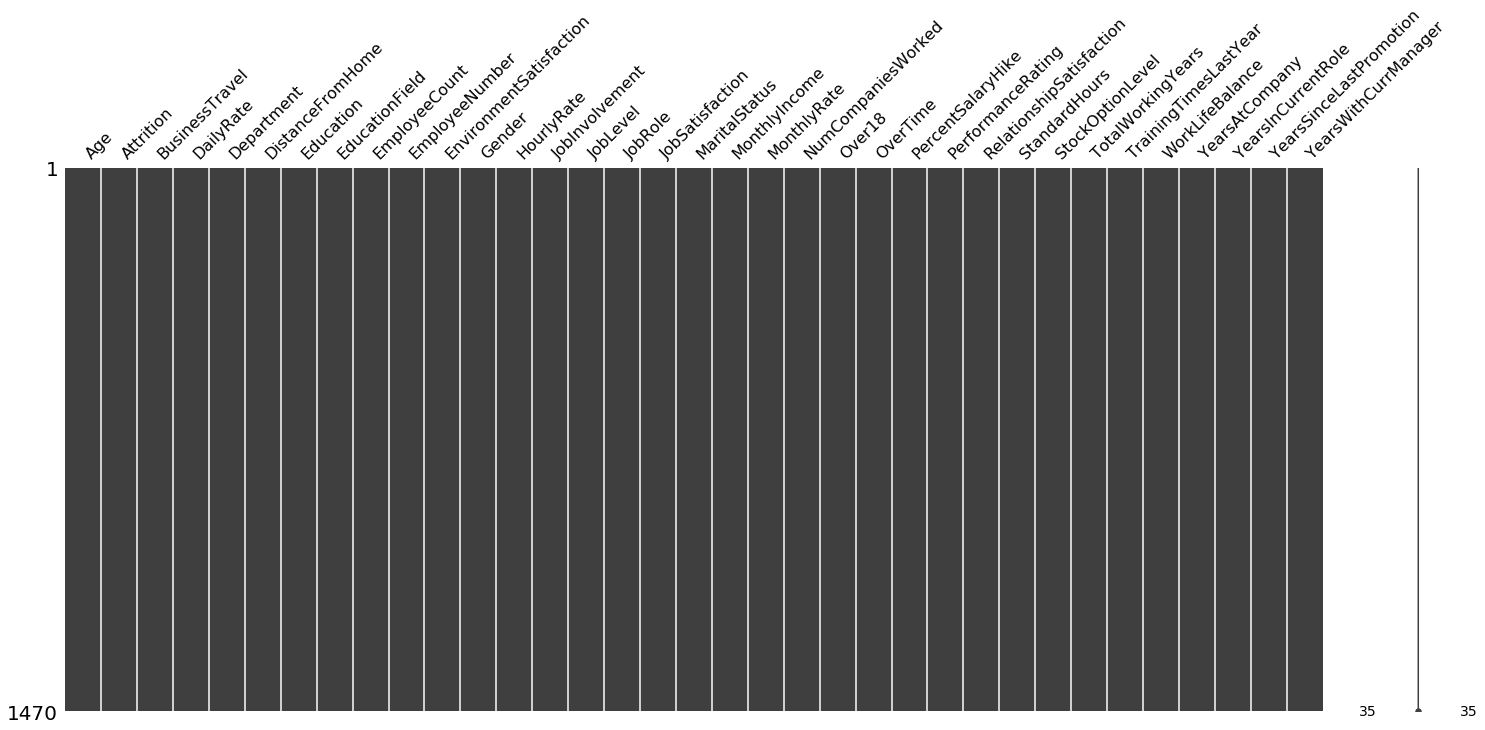

In [11]:
msno.matrix(df)

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df.loc[[0]]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


In [14]:
df.Age.loc[[169]]

169    32
Name: Age, dtype: int64

In [15]:
df["Department"].loc[[169]]

169    Research & Development
Name: Department, dtype: object

In [16]:
df[["Age", "Department"]].loc[[169]]

,Age,Department
169,32,Research & Development


In [17]:
df.loc[56:60]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
56,35,No,Travel_Frequently,853,Sales,18,5,Life Sciences,1,74,...,4,80,1,9,3,2,9,8,1,8
57,35,No,Travel_Rarely,1142,Research & Development,23,4,Medical,1,75,...,3,80,1,4,3,3,2,2,2,2
58,31,No,Travel_Rarely,655,Research & Development,7,4,Life Sciences,1,76,...,4,80,1,10,3,2,7,7,1,7
59,37,No,Travel_Rarely,1115,Research & Development,1,4,Life Sciences,1,77,...,3,80,1,7,2,4,7,5,0,7
60,32,No,Travel_Rarely,427,Research & Development,1,3,Medical,1,78,...,2,80,1,9,3,3,9,8,7,8


In [18]:
df.drop([50,14,31], axis=0).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
df.drop(df.index[1:9], axis=0).head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
16,32,No,Travel_Rarely,334,Research & Development,5,2,Life Sciences,1,21,...,4,80,2,7,5,2,6,2,0,5
17,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22,...,2,80,2,1,2,2,1,0,0,0


In [20]:
df[100:].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
100,37,Yes,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,133,...,4,80,0,7,3,3,3,2,0,2
101,32,No,Travel_Rarely,827,Research & Development,1,1,Life Sciences,1,134,...,4,80,0,1,2,3,1,0,0,0
102,20,Yes,Travel_Frequently,871,Research & Development,6,3,Life Sciences,1,137,...,2,80,0,1,5,3,1,0,1,0
103,34,No,Travel_Rarely,665,Research & Development,6,4,Other,1,138,...,3,80,0,16,3,3,16,13,2,10
104,37,No,Non-Travel,1040,Research & Development,2,2,Life Sciences,1,139,...,4,80,1,17,2,4,1,0,0,0


In [21]:
df.Age.values

array([41, 49, 37, ..., 27, 49, 34])

In [22]:
df[['Age','BusinessTravel']].values

array([[41, 'Travel_Rarely'],
       [49, 'Travel_Frequently'],
       [37, 'Travel_Rarely'],
       ...,
       [27, 'Travel_Rarely'],
       [49, 'Travel_Frequently'],
       [34, 'Travel_Rarely']], dtype=object)

In [23]:
df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [24]:
df.Age.nunique()

43

In [25]:
df.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [26]:
df.agg(['count', 'size', 'nunique'])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,...,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
size,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,...,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
nunique,43,2,3,886,3,29,5,6,1,1470,...,4,1,4,40,7,4,37,19,16,18


In [27]:
df.groupby('Age').agg(['count', 'size', 'nunique']).stack()

Attrition  BusinessTravel  DailyRate  Department  \
Age                                                             
18  count            8               8          8           8   
    size             8               8          8           8   
    nunique          2               3          8           2   
19  count            9               9          9           9   
    size             9               9          9           9   
...                ...             ...        ...         ...   
59  size            10              10         10          10   
    nunique          1               3         10           3   
60  count            5               5          5           5   
    size             5               5          5           5   
    nunique          1               2          5           2   

             DistanceFromHome  Education  EducationField  EmployeeCount  \
Age                                                                       
18  count                   8          8               8              8   
    size                    8          8               8              8   
    nunique                 6          3               3              1   
19  count                   9          9               9              9   
    size                    9          9               9              9   
...                       ...        ...             ...            ...   
59  size                   10         10              10             10   
    nunique                 6          4               4              1   
60  count                   5          5               5              5   
    size                    5          5               5              5   
    nunique                 4          2               3              1   

             EmployeeNumber  EnvironmentSatisfaction  ...  \
Age                                                   ...   
18  count                 8                        8  ...   
    size                  8                        8  ...   
    nunique               8                        3  ...   
19  count                 9                        9  ...   
    size                  9                        9  ...   
...                     ...                      ...  ...   
59  size                 10                       10  ...   
    nunique              10                        4  ...   
60  count                 5                        5  ...   
    size                  5                        5  ...   
    nunique               5                        3  ...   

             RelationshipSatisfaction  StandardHours  StockOptionLevel  \
Age                                                                      
18  count                           8              8                 8   
    size                            8              8                 8   
    nunique                         3              1                 1   
19  count                           9              9                 9   
    size                            9              9                 9   
...                               ...            ...               ...   
59  size                           10             10                10   
    nunique                         3              1                 3   
60  count                           5              5                 5   
    size                            5              5                 5   
    nunique                         3              1                 2   

             TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
Age                                                                      
18  count                    8                      8                8   
    size                     8                      8                8   
    nunique                  1                      5                3   
19  count                    9                      9           

In [28]:
df.groupby('Age').agg(['count', 'size', 'nunique'])

Attrition              BusinessTravel              DailyRate               \
        count size nunique          count size nunique     count size nunique   
Age                                                                             
18          8    8       2              8    8       3         8    8       8   
19          9    9       2              9    9       3         9    9       9   
20         11   11       2             11   11       2        11   11      11   
21         13   13       2             13   13       3        13   13      13   
22         16   16       2             16   16       3        16   16      15   
23         14   14       2             14   14       2        14   14      14   
24         26   26       2             26   26       3        26   26      26   
25         26   26       2             26   26       3        26   26      26   
26         39   39       2             39   39       3        39   39      38   
27         48   48       2             48   48       3        48   48      46   
28         48   48       2             48   48       3        48   48      47   
29         68   68       2             68   68       3        68   68      65   
30         60   60       2             60   60       3        60   60      57   
31         69   69       2             69   69       3        69   69      66   
32         61   61       2             61   61       3        61   61      60   
33         58   58       2             58   58       3        58   58      56   
34         77   77       2             77   77       3        77   77      75   
35         78   78       2             78   78       3        78   78      76   
36         69   69       2             69   69       3        69   69      64   
37         50   50       2             50   50       3        50   50      50   
38         58   58       2             58   58       3        58   58      57   
39         42   42       2             42   42       3        42   42      42   
40         57   57       2             57   57       3        57   57      56   
41         40   40       2             40   40       3        40   40      39   
42         46   46       2             46   46       3        46   46      44   
43         32   32       2             32   32       3        32   32      31   
44         33   33       2             33   33       3        33   33      33   
45         41   41       2             41   41       3        41   41      40   
46         33   33       2             33   33       3        33   33      33   
47         24   24       2             24   24       3        24   24      24   
48         19   19       2             19   19       3        19   19      19   
49         24   24       2             24   24       3        24   24      24   
50         30   30       2             30   30       3        30   30      30   
51         19   19       2             19   19       2        19   19      19   
52         18   18       2             18   18       3        18   18      18   
53         19   19       2             19   19       3        19   19      18   
54         18   18       1             18   18       3        18   18      18   
55         22   22       2             22   22       3        22   22      21   
56         14   14       2             14   14       3        14   14      14   
57          4    4       1              4    4       1         4    4       4   
58         14   14       2             14   14       3        14   14      14   
59         10   10       1             10   10       3        10   10      10   
60          5    5       1              5    5       2         5    5       5   

    Department  ... YearsAtCompany YearsInCurrentRole               \
         count  ...        nunique              count size nunique   
Age             ...                                                  
18           8  ...              1                  8    8       1 

In [29]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1291,37,Yes,Travel_Rarely,370,Research & Development,10,4,Medical,1,1809,...,2,80,0,10,4,1,10,3,0,8
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,...,3,80,0,0,2,4,0,0,0,0
720,30,Yes,Travel_Rarely,138,Research & Development,22,3,Life Sciences,1,1004,...,2,80,0,7,2,3,5,2,0,1
763,34,No,Travel_Rarely,1333,Sales,10,4,Life Sciences,1,1055,...,4,80,1,1,2,3,1,1,0,0
976,56,No,Travel_Rarely,1369,Research & Development,23,3,Life Sciences,1,1373,...,1,80,1,33,0,3,19,16,15,9


In [30]:
df_sample.shape

(74, 35)

In [31]:
df_copy = df.copy()
df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
df_copy.shape

(1470, 35)

In [33]:
list(df['Department'].unique())

['Sales', 'Research & Development', 'Human Resources']

In [34]:
keys = list(df['Department'].unique())
vals = range(1,4)
dept = dict(zip(keys, vals))
dept

{'Sales': 1, 'Research & Development': 2, 'Human Resources': 3}

In [35]:
df_copy['Department_cat'] = df['Department'].map(dept)

In [36]:

df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_cat
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,2
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,2


In [37]:
df_copy.shape

(1470, 36)

In [38]:
df_copy['Age'].mean()

36.923809523809524

In [39]:
df_copy['Age'][df_copy['Department_cat'] == 2]

1       49
2       37
3       33
4       27
5       32
        ..
1463    31
1465    36
1466    39
1467    27
1469    34
Name: Age, Length: 961, dtype: int64

In [40]:
df_copy['Age'][df_copy['Department_cat'] == 2].mean()

37.0426638917794

In [41]:
df_copy.groupby(["Department_cat", "Age"]).count()

Attrition  BusinessTravel  DailyRate  Department  \
Department_cat Age                                                     
1              18           3               3          3           3   
               19           3               3          3           3   
               20           5               5          5           5   
               21           6               6          6           6   
               23           3               3          3           3   
...                       ...             ...        ...         ...   
3              51           1               1          1           1   
               54           2               2          2           2   
               55           1               1          1           1   
               56           1               1          1           1   
               59           2               2          2           2   

                    DistanceFromHome  Education  EducationField  \
Department_cat Age                                                
1              18                  3          3               3   
               19                  3          3               3   
               20                  5          5               5   
               21                  6          6               6   
               23                  3          3               3   
...                              ...        ...             ...   
3              51                  1          1               1   
               54                  2          2               2   
               55                  1          1               1   
               56                  1          1               1   
               59                  2          2               2   

                    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
Department_cat Age                                                           
1              18               3               3                        3   
               19               3               3                        3   
               20               5               5                        5   
               21               6               6                        6   
               23               3               3                        3   
...                           ...             ...                      ...   
3              51               1               1                        1   
               54               2               2                        2   
               55               1               1                        1   
               56               1               1                        1   
               59               2               2                        2   

                    ...  RelationshipSatisfaction  StandardHours  \
Department_cat Age  ...                                            
1              18   ...                         3              3   
               19   ...                         3              3   
               20   ...                         5              5   
               21   ...                         6              6   
               23   ...                         3              3   
...                 ...                       ...            ...   
3              51   ...                         1              1   
               54   ...                         2              2   
               55   ...                         1              1   
               56   ...                         1              1   
               59   ...                         2              2   

                    StockOptionLevel  TotalWorkingYears  \
Department_cat Age                                        
1              18                  3                  3   
               19                  3                  3   
               20                  5                  5   
               2

In [42]:
df_copy.groupby(["Department_cat"])[["Age"]].count()

,Age
Department_cat,
1,446
2,961
3,63


In [44]:
df_copy.Department

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object

In [45]:
df_sample = df_copy.sample(frac=0.05, random_state=1)
df_sample.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_cat
1291,37,Yes,Travel_Rarely,370,Research & Development,10,4,Medical,1,1809,...,80,0,10,4,1,10,3,0,8,2
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,...,80,0,0,2,4,0,0,0,0,1
720,30,Yes,Travel_Rarely,138,Research & Development,22,3,Life Sciences,1,1004,...,80,0,7,2,3,5,2,0,1,2
763,34,No,Travel_Rarely,1333,Sales,10,4,Life Sciences,1,1055,...,80,1,1,2,3,1,1,0,0,1
976,56,No,Travel_Rarely,1369,Research & Development,23,3,Life Sciences,1,1373,...,80,1,33,0,3,19,16,15,9,2


In [47]:
df_sample.groupby(["Department_cat"])[["Age"]].agg([np.sum, np.mean,np.count_nonzero])

Age                         
                 sum       mean count_nonzero
Department_cat                               
1                776  36.952381            21
2               1715  36.489362            47
3                213  35.500000             6

In [49]:
df_sample.groupby(["Department_cat"]).agg({'Age':np.mean,'Education':np.mean})

,Age,Education
Department_cat,,
1,36.952381,2.952381
2,36.489362,2.808511
3,35.500000,3.000000


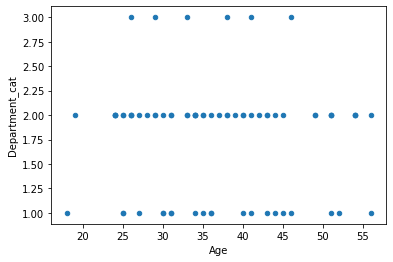

In [51]:
df_sample['Age'] = df_sample['Age'].astype('int64')
df_sample.plot(kind='scatter',x='Age',y='Department_cat')

Text(0.5, 1.0, 'Frecuencia Departamento')

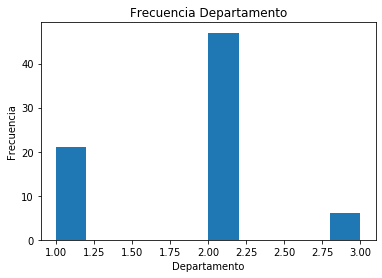

In [52]:
plt.hist(df_sample['Department_cat'])
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia Departamento')

Text(0.5, 1.0, 'Frecuencia Edad')

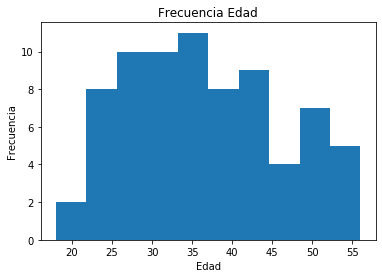

In [53]:
plt.hist(df_sample['Age'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia Edad')

Text(0.5, 1.0, 'Box Plot de Age count')

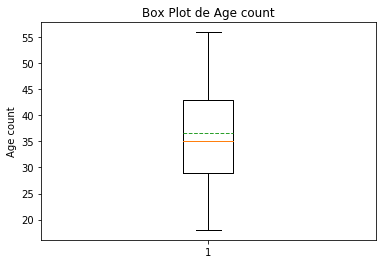

In [54]:
plt.boxplot(df_sample['Age'], showmeans=True, meanline=True)
plt.ylabel('Age count')
plt.title('Box Plot de Age count')